### First we import the csv file and print the head of the dataframe

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
# pd.options.display.width = 0
from IPython.display import display, HTML
# display(HTML("<style>.jp-Cell { width: 200% !important; }</style>"))

# Dataset was downloaded February 2025 from https://www.kaggle.com/datasets/runningwithrock/2023-marathon-results?select=Results.csv

df = pd.read_csv('Results.csv')
print(df.head()) 


             Name                     Race  Year Gender  Age  Finish  \
0   Arunas Jurkus  Salt Lake City Marathon  2023      M   55   12907   
1       Seth Reed  Salt Lake City Marathon  2023      M   24   12921   
2  Mufaro Chivasa  Salt Lake City Marathon  2023      M   54   12948   
3     Adam Cheney  Salt Lake City Marathon  2023      M   22   12954   
4   Michael Pyles  Salt Lake City Marathon  2023      M   33   12964   

  Age Bracket  
0       55-59  
1    Under 35  
2       50-54  
3    Under 35  
4    Under 35  


### Then we plot a distribution of marathon finish times by gender

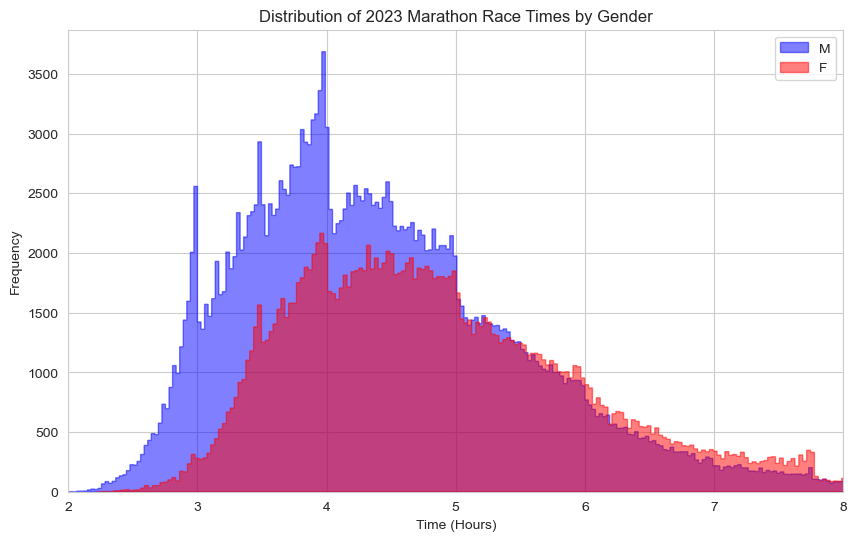

In [21]:
# Convert 'Result_hr' to timedelta
#df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Plot the distribution of race times by gender
plt.figure(figsize=(10, 6))

for gender, color in zip(['M', 'F'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]['Result_hr_numeric']
    plt.hist(gender_data, bins=500, alpha=0.5, color=color, label=gender, edgecolor=color, histtype="stepfilled")

plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of 2023 Marathon Race Times by Gender')

plt.legend()
plt.grid(True)
plt.xlim(2, 8)
plt.show()

### Can we also show a line instead of the histogram bars? Yes with a kernel density estimation (KDE) plot:

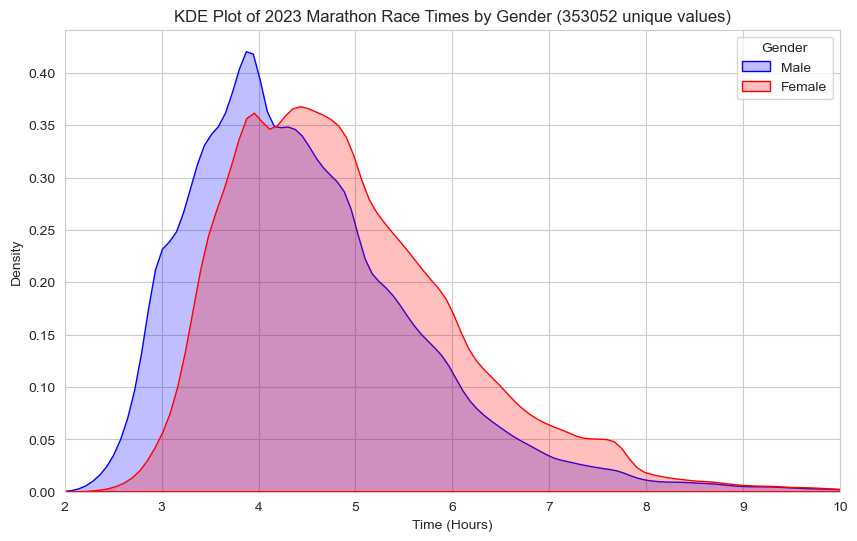

In [18]:
# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender (353052 unique values)')

plt.legend(title='Gender')
plt.xlim(2, 10)
plt.show()

### Now we also want to add horizontal lines to indicate the width of the distributions

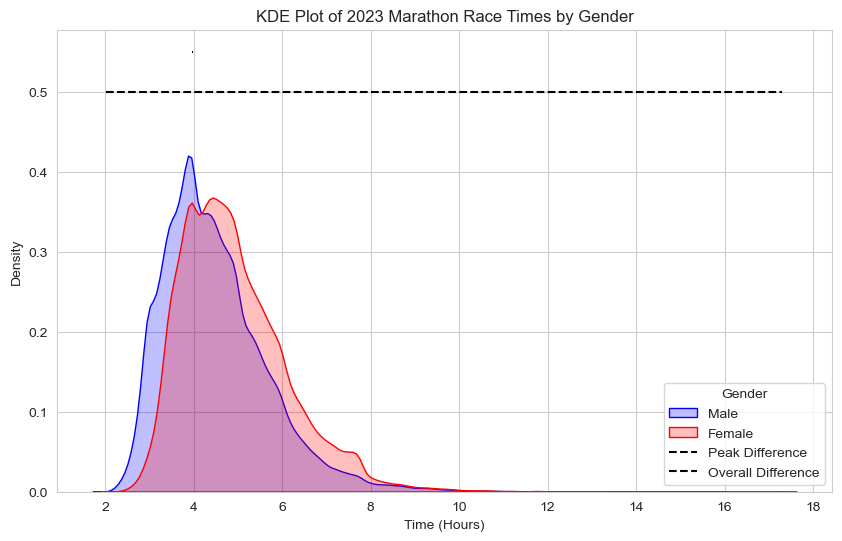

In [15]:
# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

# Calculate peak points for each gender's distribution
peak_male = df[df['Gender'] == 'M']['Result_hr_numeric'].mode().values[0]
peak_female = df[df['Gender'] == 'F']['Result_hr_numeric'].mode().values[0]

# Get x-axis limits
xlim = plt.xlim()

# Draw horizontal lines
plt.axhline(0.55, color='black', linestyle='--', label='Peak Difference', xmin=(peak_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(peak_female - xlim[0]) / (xlim[1] - xlim[0]))
#plt.axhline(peak_female, color='black', linestyle='--', label='Peak Female', xmin=(peak_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(peak_female - xlim[0]) / (xlim[1] - xlim[0]))

# Calculate overall range
min_x = df['Result_hr_numeric'].min()
max_x = df['Result_hr_numeric'].max()

# Draw second horizontal line
plt.axhline(0.5, color='black', linestyle='--', label='Overall Difference', xmin=(min_x - xlim[0]) / (xlim[1] - xlim[0]), xmax=(max_x - xlim[0]) / (xlim[1] - xlim[0]))
#plt.axhline(max_x, color='gray', linestyle=':', label='Max Overall', xmin=0, xmax=1)

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of 2023 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.show()



### The peaks form the raw data are not that close to the peaks of the smoothed KDE curve. We can calculate those peaks instead for drawing the distribution lines 

3.874314460152389 3.874314460152389


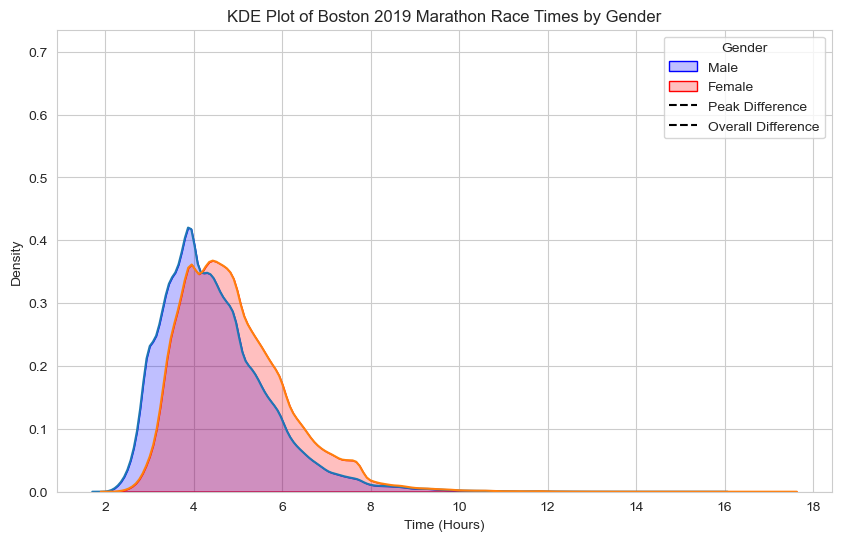

In [17]:
# Calculate race times in hours
df['Result_hr_numeric'] = df['Finish'] / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

# Calculate and plot KDE 
sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

# Calculate KDE lines only (fill=False) so we can get the line x and y
male_kde = sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', fill=False)
female_kde = sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', fill=False)

# Get the x y data of the kde distributions
x_male = male_kde.lines[0].get_xdata() 
x_female = female_kde.lines[0].get_xdata() 
y_male = male_kde.lines[0].get_ydata() 
y_female = female_kde.lines[0].get_ydata() 

# Find IDs of maximum y values of KDE curves
max_male = np.argmax(y_male)
max_female = np.argmax(y_female)

# Get x-values of the maximum points
x_max_male = x_male[max_male]
x_max_female = x_female[max_female]
print(x_max_male, x_max_female) #the calculated peaks have the identical value for M and F. There seems to be a mistake but I cannot find it

# Get x-axis limits
xlim = plt.xlim()

# Draw horizontal lines
plt.axhline(0.7, color='black', linestyle='--', label='Peak Difference', xmin=(x_max_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(x_max_female - xlim[0]) / (xlim[1] - xlim[0]))

# Calculate overall range
min_x = df['Result_hr_numeric'].min()
max_x = df['Result_hr_numeric'].max()

# Draw second horizontal line
#plt.axhline(0.65, color='black', linestyle='--', label='Overall Difference', xmin=(min_x - xlim[0]) / (xlim[1] - xlim[0]), xmax=(max_x - xlim[0]) / (xlim[1] - xlim[0]))
plt.axhline(0.65, color='black', linestyle='--', label='Overall Difference', xmin=min_x, xmax=max_x)

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of Boston 2019 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.show()